In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

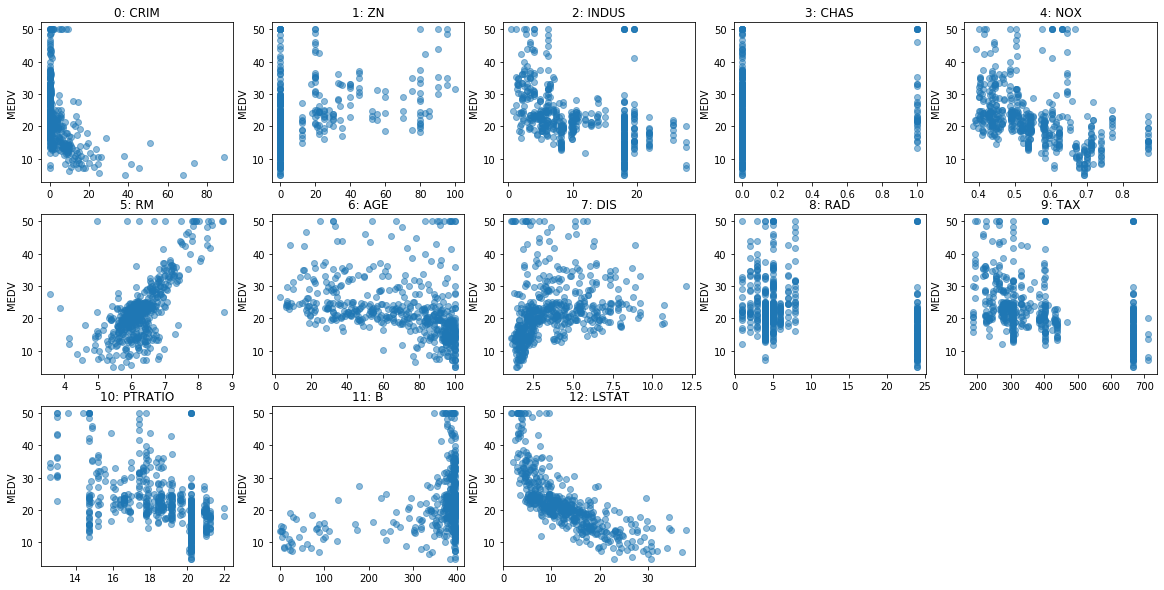

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")


Text(0, 0.5, 'MEDV')

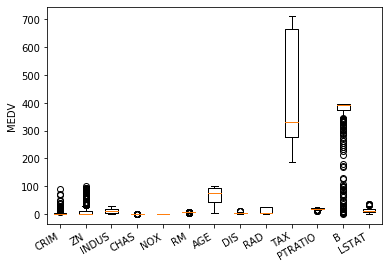

In [5]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

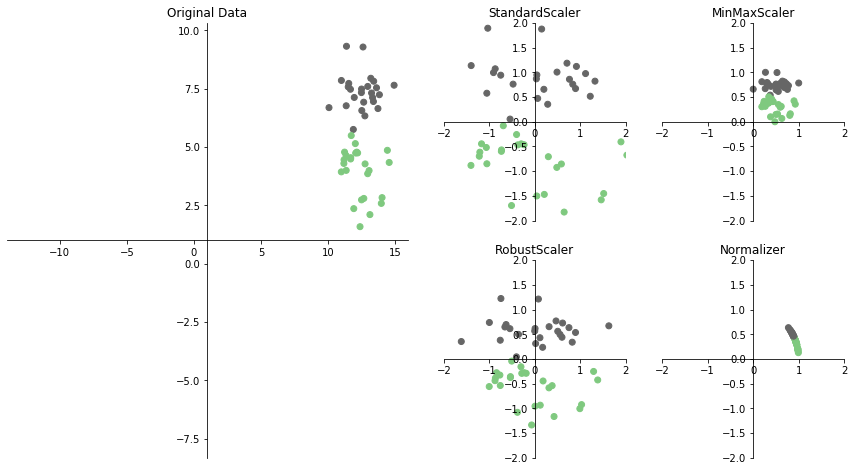

In [6]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7171539398290601, 0.1254250809504442)

In [9]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7178577409924873, 0.12714518912896486)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49901769734878754, 0.1459168750863542)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7502341979953768, 0.10562600471156965)

In [12]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):
    # multiclass                                                                  
    if eps is None:                                                               
        eps = X.std(axis=0) / 2.
    else:\
        eps = np.array([eps, eps])

    if ax is None:                                                                
        ax = plt.gca()                                                            

    x_min, x_max = X[:, 0].min() - eps[0], X[:, 0].max() + eps[0]
    y_min, y_max = X[:, 1].min() - eps[1], X[:, 1].max() + eps[1]

    xx = np.linspace(x_min, x_max, 1000)                                          
    yy = np.linspace(y_min, y_max, 1000)                                          

    X1, X2 = np.meshgrid(xx, yy)                                                  
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                        
    decision_values = classifier.predict(X_grid)                                  
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,            
                                                       y_min, y_max),             
            aspect='auto', origin='lower', alpha=alpha, cmap=plt.cm.bwr)          

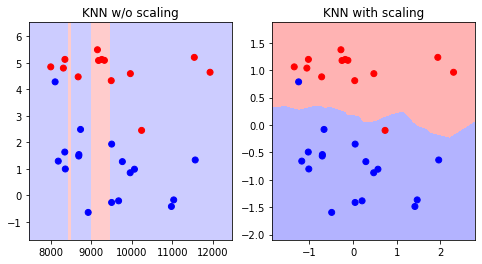

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

X, y = make_blobs(centers=2, random_state=4, n_samples=30)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))


X = X * np.array([1000, 1])

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0

knn = KNeighborsClassifier().fit(X, y)

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
axes[0].set_title("KNN w/o scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn, X, ax=axes[0], alpha=0)


X_scaled = scale(X)
knn_scaled = KNeighborsClassifier().fit(X_scaled, y)

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr')
axes[1].set_title("KNN with scaling")
# only adjust plot, don't actually plot alpha=0
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=0)

plot_2d_classification(knn, X, ax=axes[0], alpha=.2)
plot_2d_classification(knn_scaled, X_scaled, ax=axes[1], alpha=.3)



# Pipelines

In [14]:
from sklearn.linear_model import Ridge
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.6345884564889054

In [15]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6345884564889053

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7455608822349746, 0.10625173604969355)

In [17]:
print(knn_pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'))]


In [18]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [19]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Feature Distributions

Text(0, 0.5, 'MEDV')

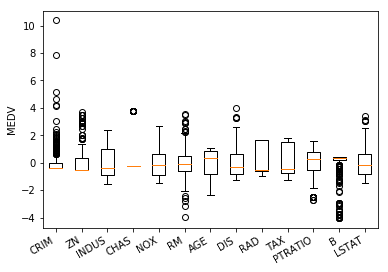

In [21]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

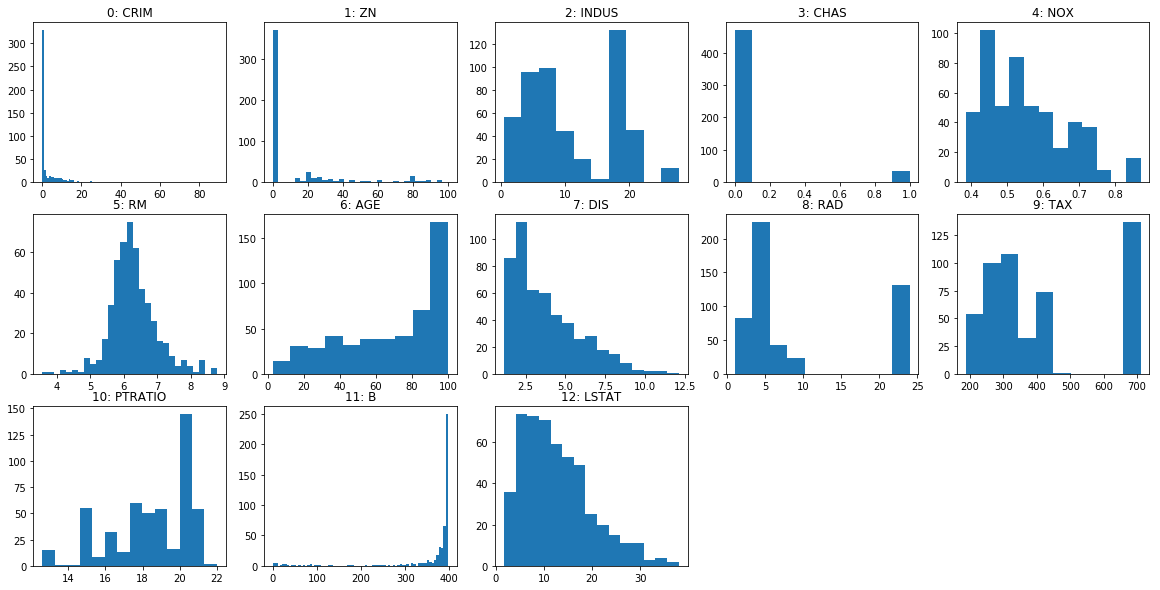

In [22]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X[:, i], bins="auto")
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
plt.savefig("images/boston_hist.png")

In [23]:
def bc(x, l):
    if l == 0:
        return np.log(x)
    else:
        return (x ** l - 1) / l


In [24]:
line = np.arange(1e-10, 10, 100)

In [25]:
line

array([1.e-10])

(0, 10)

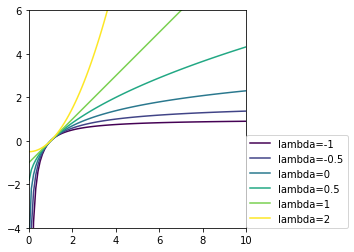

In [26]:
line = np.linspace(.01, 10, 100)
colors =  [plt.cm.viridis(i) for i in np.linspace(0, 1, 6)]
for l, c in zip([-1, -.5, 0, .5, 1, 2], colors):
    plt.plot(line, bc(line, l), label="lambda={}".format(l), color=c)
plt.ylim(-4, 6)
plt.gca().set_aspect("equal")
plt.legend(loc=(1, 0))
plt.xlim(0, 10)

In [27]:
from sklearn.preprocessing import MinMaxScaler
# this is very hacky and you probably shouldn't do this in real life.
X_train_mm = MinMaxScaler().fit_transform(X_train) + 1e-5

[-22.83781945  -8.42863648  -0.65274636 -21.87132843  -1.10590411
   0.27608455   3.05504705  -2.8228078   -3.46557477  -1.75663877
   3.83256611  14.3325249   -1.75533113]


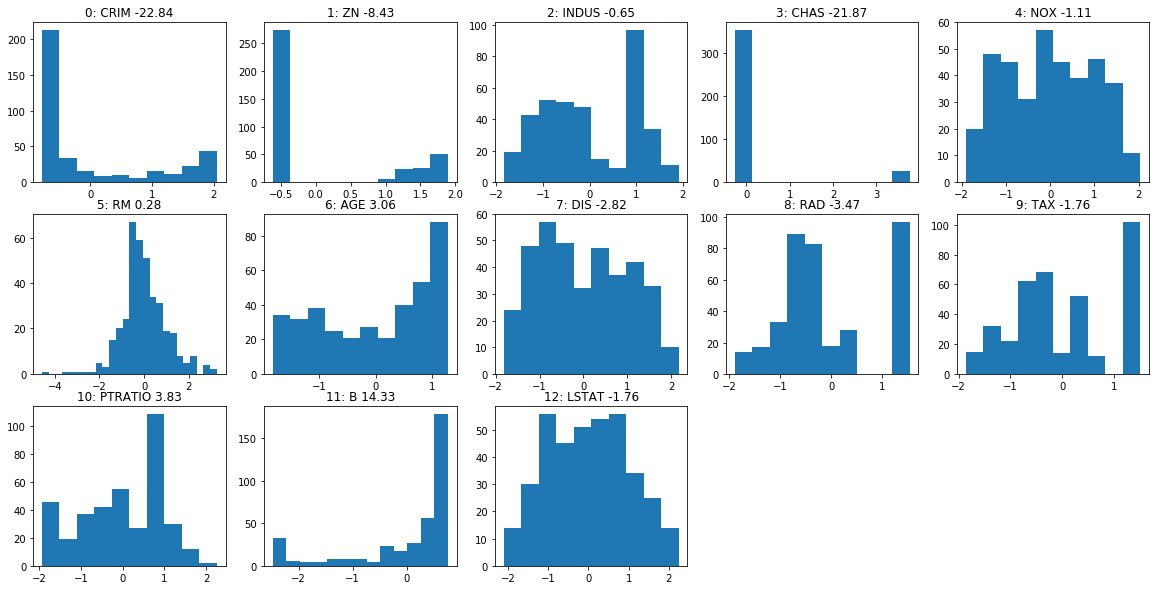

In [28]:
# from sklearn dev branch (0.20-dev)
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
pt = PowerTransformer()
X_bc = pt.fit_transform(X_train_mm)
print(pt.lambdas_)

for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X_bc[:, i], bins="auto")
    ax.set_title("{}: {} {:.2f}".format(i, boston.feature_names[i], pt.lambdas_[i]))
plt.savefig("images/boston_hist_boxcox.png")

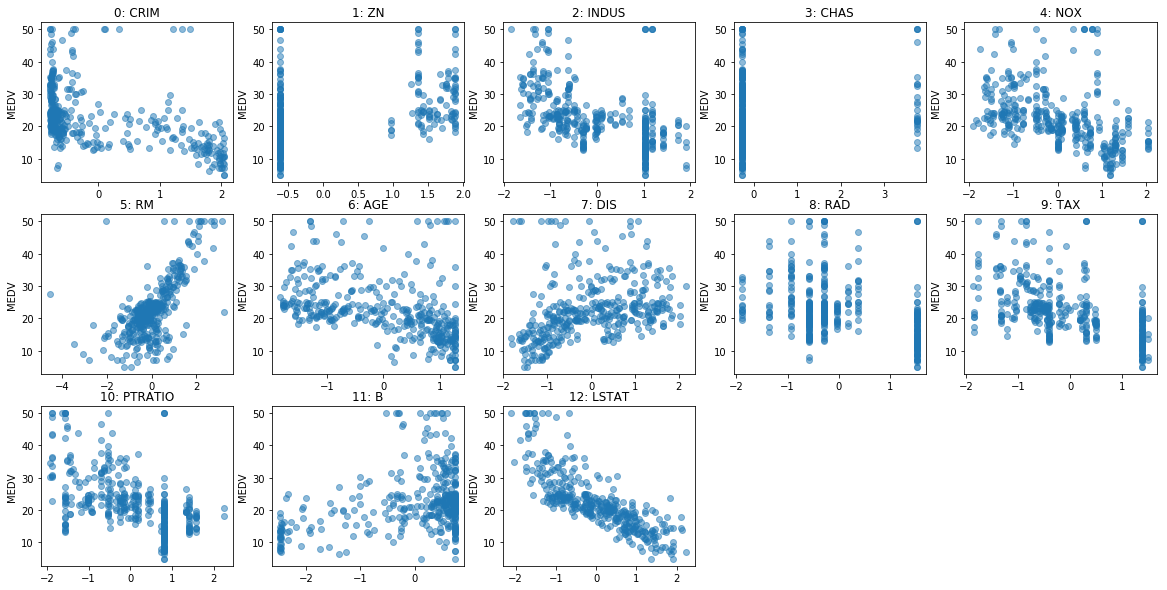

In [29]:
X_bc_scaled = StandardScaler().fit_transform(X_bc)
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_bc_scaled[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")
plt.savefig("images/boston_bc_scaled_scatter.png")

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.71715393988479, 0.12542508097376034)

In [31]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))


0.7178577409924873 0.12714518912896486


In [32]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7331923222715597, 0.0993766279744298)

In [33]:
ridge = RidgeCV().fit(X_train_scaled, y_train)
ridge_bc = RidgeCV().fit(X_bc_scaled, y_train)

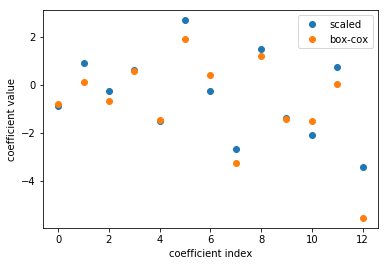

In [34]:
plt.plot(ridge.coef_, 'o', label="scaled")
plt.plot(ridge_bc.coef_, 'o', label="box-cox")
plt.xlabel("coefficient index")
plt.ylabel("coefficient value")
plt.legend()

In [35]:
# Categorical Variables

In [36]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,salary,boro
0,103,Manhattan
1,89,Queens
2,142,Manhattan
3,54,Brooklyn
4,63,Brooklyn
5,219,Bronx


In [37]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [38]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1,0, 2, 2, 3]})
df

,salary,boro
0,103,0
1,89,1
2,142,0
3,54,2
4,63,2
5,219,3


In [39]:
pd.get_dummies(df, columns=['boro'])

,salary,boro_0,boro_1,boro_2,boro_3
0,103,1,0,0,0
1,89,0,1,0,0
2,142,1,0,0,0
3,54,0,0,1,0
4,63,0,0,1,0
5,219,0,0,0,1


In [40]:
df2 = pd.DataFrame({'salary': [73, 98, 204, 54],
                   'boro': ['Staten Island', 'Manhattan', 'Brooklyn', 'Bronx']})
df2

,salary,boro
0,73,Staten Island
1,98,Manhattan
2,204,Brooklyn
3,54,Bronx


In [41]:
pd.get_dummies(df2)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Staten Island
0,73,0,0,0,1
1,98,0,0,1,0
2,204,0,1,0,0
3,54,1,0,0,0


In [42]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
df['boro'] = pd.Categorical(
    df.boro, categories=['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
df_dummies = pd.get_dummies(df)
print(df_dummies.to_string())
df_dummies

   salary  boro_Manhattan  boro_Queens  boro_Brooklyn  boro_Bronx  boro_Staten Island
0     103               1            0              0           0                   0
1      89               0            1              0           0                   0
2     142               1            0              0           0                   0
3      54               0            0              1           0                   0
4      63               0            0              1           0                   0
5     219               0            0              0           1                   0


,salary,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,1,0,0,0,0
1,89,0,1,0,0,0
2,142,1,0,0,0,0
3,54,0,0,1,0,0
4,63,0,0,1,0,0
5,219,0,0,0,1,0


# Feature Engineering

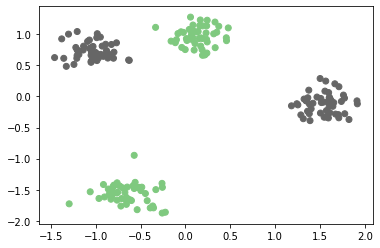

In [15]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
X, y = make_blobs(n_samples=200, centers=4, random_state=42)
X = scale(X)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

In [16]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegressionCV().fit(X_train, y_train)
logreg.score(X_test, y_test)

/Users/gceran/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5

(-2, 1.8)

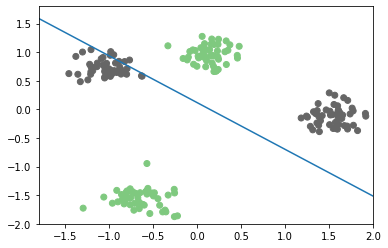

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()

plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])

plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

In [23]:
X[0:5,1:]

array([[-0.07101914],
       [ 1.11072042],
       [ 0.56537788],
       [ 0.48378099],
       [-1.42681247]])

In [46]:
# Same as PolynomialFeatures(order=2, interactions_only=True)
X_interaction = np.hstack([X, X[:, 0:1] * X[:, 1:]])

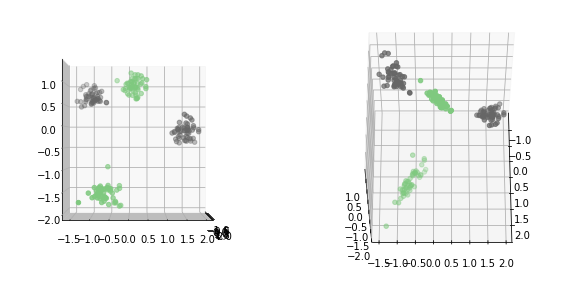

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=0., azim=0)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_interaction[:, 2], X_interaction[:, 0], X_interaction[:, 1], c=y, cmap="Accent")
ax.view_init(elev=60., azim=0)

In [48]:
X_i_train, X_i_test, y_train, y_test = train_test_split(X_interaction, y, random_state=0)
logreg3 = LogisticRegressionCV().fit(X_i_train, y_train)
logreg3.score(X_i_test, y_test)

/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.96

(-2, 1.8)

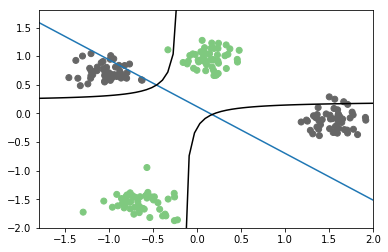

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()
coef3 = logreg3.coef_.ravel()
plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])
curve = -(coef3[0] * line + logreg3.intercept_) / (coef3[1] + line * coef3[2])
mask = coef3[1] + line * coef3[2] > 0
plt.plot(line[mask], curve[mask], c='k')
plt.plot(line[~mask], curve[~mask], c='k')
plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)

# Discrete interactions

In [50]:
df = pd.DataFrame({'gender': ['M', 'F', 'M', 'F', 'F'],
                   'age': [14, 16, 12, 25, 22],
                   'spend$': [70, 12, 42, 64, 93],
                   'articles_bought': [5, 10, 2, 1, 1],
                   'time_online': [269, 1522, 235, 63, 21]
                  })
df

,gender,age,spend$,articles_bought,time_online
0,M,14,70,5,269
1,F,16,12,10,1522
2,M,12,42,2,235
3,F,25,64,1,63
4,F,22,93,1,21


In [51]:
dummies = pd.get_dummies(df)
dummies

,age,spend$,articles_bought,time_online,gender_F,gender_M
0,14,70,5,269,0,1
1,16,12,10,1522,1,0
2,12,42,2,235,0,1
3,25,64,1,63,1,0
4,22,93,1,21,1,0


In [52]:
[x + "_F" for x in dummies.columns]

['age_F',
 'spend$_F',
 'articles_bought_F',
 'time_online_F',
 'gender_F_F',
 'gender_M_F']

In [53]:
df_f = dummies.multiply(dummies.gender_F, axis='rows')
df_f = df_f.rename(columns=lambda x: x + "_F")

df_m = dummies.multiply(dummies.gender_M, axis='rows')
df_m = df_m.rename(columns=lambda x: x + "_M")

In [54]:
res = pd.concat([df_m, df_f], axis=1).drop(["gender_F_M", "gender_M_F"], axis=1)
res

,age_M,spend$_M,articles_bought_M,time_online_M,gender_M_M,age_F,spend$_F,articles_bought_F,time_online_F,gender_F_F
0,14,70,5,269,1,0,0,0,0,0
1,0,0,0,0,0,16,12,10,1522,1
2,12,42,2,235,1,0,0,0,0,0
3,0,0,0,0,0,25,64,1,63,1
4,0,0,0,0,0,22,93,1,21,1


# Polynomial Features

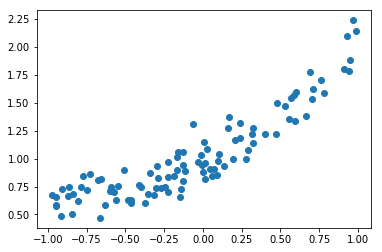

In [55]:
rng = np.random.RandomState(2)
x = rng.uniform(-1, 1, size=(100,))
X = x.reshape(-1, 1)
x_noisy = x + rng.normal(scale=0.1, size=x.shape)
coef = rng.normal(size=3)
y = coef[0] * x_noisy ** 2 + coef[1] * x_noisy + coef[2] + rng.normal(scale=0.1, size=x.shape)
plt.plot(x, y, 'o')

0.7633239152617027

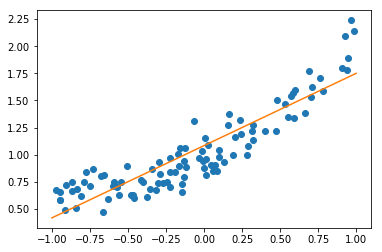

In [56]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
line = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
lr.score(X_test, y_test)

0.8336786269754218

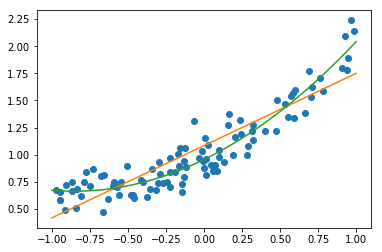

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_lr = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

poly_lr.fit(X_train, y_train)

plt.plot(x, y, 'o')
plt.plot(line, lr.predict(line))
plt.plot(line, poly_lr.predict(line))
poly_lr.score(X_test, y_test)

In [58]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_bc_poly = poly.fit_transform(X_bc_scaled)
print(X_bc_scaled.shape)
print(X_bc_poly.shape)

(379, 13)
(379, 105)


In [60]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7331923222715597, 0.0993766279744298)

In [61]:
scores = cross_val_score(RidgeCV(), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.8611295408902657, 0.08920856395123906)

In [62]:
from sklearn.linear_model import LassoCV, Lasso
scores = cross_val_score(LassoCV(cv=10), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/gceran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

(0.8384186754099774, 0.1252980932018851)

In [63]:
from sklearn.feature_selection import SelectFromModel
lasso = Lasso(alpha=.1).fit(X_bc_poly, y_train)
select = SelectFromModel(lasso, prefit=True)

In [65]:
X_selected = np.hstack([X_bc_scaled, select.transform(X_bc_poly)])

In [66]:
X_selected.shape

(379, 57)

In [67]:
scores = cross_val_score(RidgeCV(), X_selected, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.8771757013153214, 0.08386860584056413)

In [68]:
scores

array([0.93699042, 0.90083647, 0.66604482, 0.80188962, 0.8716947 ,
       0.91945834, 0.85470573, 0.95884803, 0.95561052, 0.90567836])

In [69]:
poly_feature_names = select.transform(np.array(poly.get_feature_names(boston.feature_names)).reshape(1, -1)).ravel()

In [70]:
new_feature_names = np.hstack([boston.feature_names, poly_feature_names])

In [71]:
new_feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'LSTAT', 'CRIM^2', 'CRIM INDUS', 'CRIM RM', 'CRIM AGE',
       'CRIM B', 'CRIM LSTAT', 'ZN RM', 'ZN PTRATIO', 'INDUS TAX',
       'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE', 'CHAS PTRATIO',
       'CHAS B', 'CHAS LSTAT', 'NOX RM', 'NOX RAD', 'NOX PTRATIO', 'RM^2',
       'RM AGE', 'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM LSTAT',
       'AGE RAD', 'AGE LSTAT', 'DIS TAX', 'DIS LSTAT', 'RAD^2', 'TAX^2',
       'TAX PTRATIO', 'PTRATIO^2', 'PTRATIO B', 'PTRATIO LSTAT', 'B^2',
       'LSTAT^2'], dtype='<U13')

In [72]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only=True), RidgeCV())

# count featurizer

In [73]:
data = pd.read_csv("https://github.com/amueller/ml-training-advanced/raw/master/notebooks/data/adult.csv", index_col=0)


In [74]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [75]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [76]:
income_by_country = data.groupby('native-country').income
counts = income_by_country.value_counts().unstack().fillna(0)
counts

income,<=50K,>50K
native-country,,
?,437.0,146.0
Cambodia,12.0,7.0
Canada,82.0,39.0
China,55.0,20.0
Columbia,57.0,2.0
Cuba,70.0,25.0
Dominican-Republic,68.0,2.0
Ecuador,24.0,4.0
El-Salvador,97.0,9.0


In [77]:
frequencies = counts.divide(counts.sum(axis=1), axis='rows')
print(frequencies.to_string())

income                          <=50K      >50K
native-country                                 
 ?                           0.749571  0.250429
 Cambodia                    0.631579  0.368421
 Canada                      0.677686  0.322314
 China                       0.733333  0.266667
 Columbia                    0.966102  0.033898
 Cuba                        0.736842  0.263158
 Dominican-Republic          0.971429  0.028571
 Ecuador                     0.857143  0.142857
 El-Salvador                 0.915094  0.084906
 England                     0.666667  0.333333
 France                      0.586207  0.413793
 Germany                     0.678832  0.321168
 Greece                      0.724138  0.275862
 Guatemala                   0.953125  0.046875
 Haiti                       0.909091  0.090909
 Holand-Netherlands          1.000000  0.000000
 Honduras                    0.923077  0.076923
 Hong                        0.700000  0.300000
 Hungary                     0.769231  0

In [78]:
data['frequency'] = data['native-country'].map(frequencies[' >50K'])

In [79]:
print(data[['frequency','native-country','income']].to_string())

       frequency               native-country  income
0       0.245835                United-States   <=50K
1       0.245835                United-States   <=50K
2       0.245835                United-States   <=50K
3       0.245835                United-States   <=50K
4       0.263158                         Cuba   <=50K
5       0.245835                United-States   <=50K
6       0.123457                      Jamaica   <=50K
7       0.245835                United-States    >50K
8       0.245835                United-States    >50K
9       0.245835                United-States    >50K
10      0.245835                United-States    >50K
11      0.400000                        India    >50K
12      0.245835                United-States   <=50K
13      0.245835                United-States   <=50K
14      0.250429                            ?    >50K
15      0.051322                       Mexico   <=50K
16      0.245835                United-States   <=50K
17      0.245835            